# **DESAFIO MUTUAL**

Olá, meu nome é Diogo Antônio de Jesus e este é o meu projeto do processo seletivo de estágio em Ciência de Dados.

---




Este trabalho esta dividido e 5 etapas:




*   **Engenharia de Feature**

Leitura do arquivo CSV e Json e relacionamento das base de dados.

*   **Data Clearing**

Limpeza de dados e detecção e correção de registros corrompidos ou imprecisos de um conjunto de registros (Analisar  outliers, dados nulos)

*   **Analise Exploratoria dos dados e Visualizações**

Resumo das características principais, com métodos visuais e utilizando graficos estatisticos.

*   **Machine Learn**

Divisão dos dados em treinamento e teste, pré-processamento dos dados, normalização e utilização da função SMOTE para balancear a variavel target.



*   **Avaliação de Resultados e conclusão**

Métrica para avaliar os modelos de Machine Learning, matriz de confusão,Acurácia, Precision, Recall, F1- Score, Curva ROC.










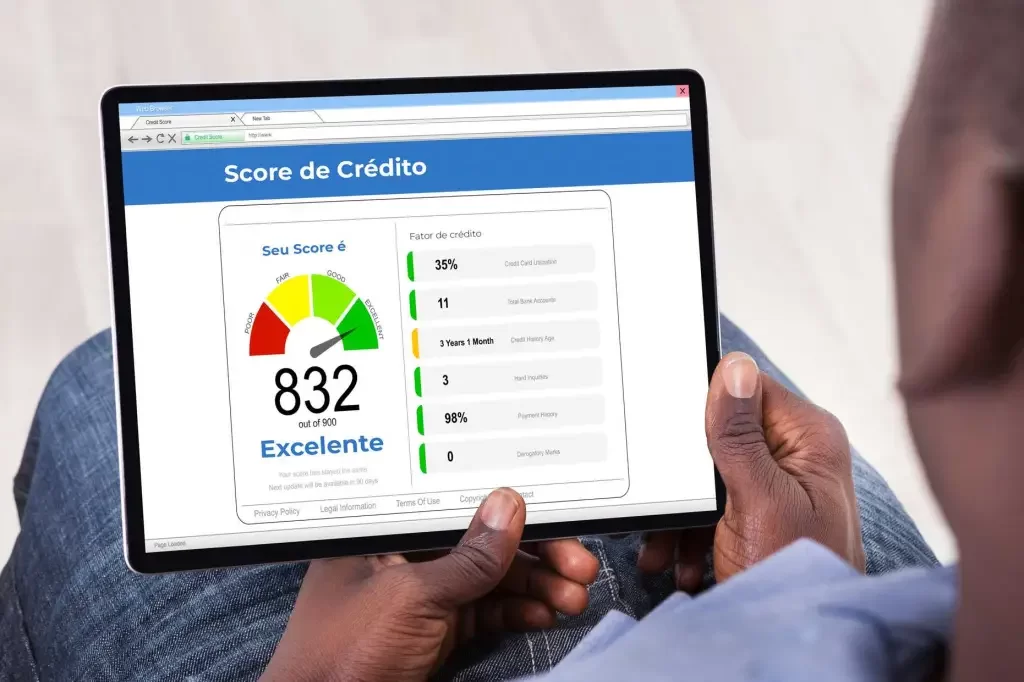

# **Identificando e explorando o problema de negócio**

Nosso foco inicial é entender o perfil dos clientes não pagadores dos emprestimos, pois afinal são eles o maior passivo de uma instituição financeira, a Mutual é uma instituição financeira especializada em intermediar o dinheiro entre poupadores e aqueles que precisam de empréstimos.


#**Engenharia de features**

In [66]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px 
warnings.filterwarnings("ignore")


import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import roc_curve, auc


### Lendo o arquivo CSV

In [68]:
dados = pd.read_csv('/content/clients.csv')
dados

,X,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,...,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth
0,1,2,15,F,S,18,0,NaN,Y,31,...,12,853,0.0,Y,N,0,N,N,300.0,0
1,2,4,12,F,C,47,0,NaN,N,31,...,24,35,0.0,Y,N,0,N,N,304.0,0
2,3,5,16,F,S,28,0,NaN,Y,31,...,12,24,0.0,Y,N,0,N,N,250.0,0
3,4,6,24,M,S,26,0,NaN,N,31,...,0,999,0.0,Y,N,0,N,N,800.0,0
4,5,7,55,F,S,22,0,NaN,Y,31,...,48,999,0.0,Y,N,0,N,N,410.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40159,17520,21963,22,F,D,37,0,NaN,Y,31,...,12,38,0.0,Y,N,0,N,N,314.0,0
40160,17521,21964,16,F,S,45,0,NaN,Y,31,...,0,525,0.0,Y,N,0,N,N,0.0,0
40161,17522,21966,1,F,C,47,0,NaN,Y,31,...,0,720,2100.0,Y,N,0,N,N,0.0,0
40162,17523,21967,14,F,C,56,0,NaN,Y,31,...,432,713,0.0,Y,N,0,N,N,2200.0,0


### Lendo o arquivo JSON

In [69]:
score_json = pd.read_json(path_or_buf='/content/neg.json',orient='Columns')
score_json

,clientId,NEG,date
0,2,0,2016-07-24
1,4,0,2011-02-21
2,5,0,2008-04-04
3,6,0,2017-09-21
4,7,0,2009-12-08
...,...,...,...
39995,49994,1,2014-12-17
39996,49995,0,2022-07-23
39997,49996,0,2004-01-10
39998,49998,1,2017-12-20


In [70]:
# verificando o type da base de dados Json
type(score_json)

pandas.core.frame.DataFrame

### Combinando DataFrames a partir de uma chave de ligação = ClientId

In [71]:
# separando a coluna clienteid de cada base de dados para verificar se há uma ligação entre ambas
dados_clientes = dados.clientId
dados_score = score_json.clientId

In [72]:
# Verificando se existe correspondência entre as variáveis de ligação
dados_clientes.isin(dados_score)

0        True
1        True
2        True
3        True
4        True
         ... 
40159    True
40160    True
40161    True
40162    True
40163    True
Name: clientId, Length: 40164, dtype: bool

In [73]:
# utilizando merge para conbinar as duas bases de dados a partir da coluna clienteid
tabela_completa = pd.merge(left=dados, right=score_json, on = 'clientId')

# visualizando os 3 ultimmos dados da tabela vinculada
tabela_completa.tail(3)

,X,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,...,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth,NEG,date
40161,39998,49996,19,M,S,21,0,NaN,Y,31,...,0.0,Y,N,0,N,N,234.0,0,0,2004-01-10
40162,39999,49998,23,F,S,23,0,NaN,Y,31,...,0.0,Y,N,0,N,N,240.0,0,1,2017-12-20
40163,40000,50000,22,M,S,29,0,NaN,Y,31,...,0.0,Y,N,0,N,N,341.0,0,0,2020-11-13


In [74]:
# visualizando os 3 primeiros dados da tabela vinculada
tabela_completa.head(3)

,X,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,...,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth,NEG,date
0,1,2,15,F,S,18,0,NaN,Y,31,...,0.0,Y,N,0,N,N,300.0,0,0,2016-07-24
1,2,4,12,F,C,47,0,NaN,N,31,...,0.0,Y,N,0,N,N,304.0,0,0,2011-02-21
2,3,5,16,F,S,28,0,NaN,Y,31,...,0.0,Y,N,0,N,N,250.0,0,0,2008-04-04


In [75]:
# dados categoricos com apenas duas saidas serão transformados em ( 0 / 1)
tabela_completa['gender'] = tabela_completa['gender'].map({'F':1, 'M':0})
tabela_completa['flagResidencialPhone'] = tabela_completa['flagResidencialPhone'].map({'Y':1, 'N':0})
tabela_completa['flagMothersName'] = tabela_completa['flagMothersName'].map({'Y':1, 'N':0})
tabela_completa['flagFathersName'] = tabela_completa['flagFathersName'].map({'Y':1, 'N':0})
tabela_completa['flagResidenceTown_WorkingTown'] = tabela_completa['flagResidenceTown_WorkingTown'].map({'Y':1, 'N':0})
tabela_completa['flagResidenceState_WorkingState'] = tabela_completa['flagResidenceState_WorkingState'].map({'Y':1, 'N':0})
tabela_completa['flagResidencialAddress_PostalAddress'] = tabela_completa['flagResidencialAddress_PostalAddress'].map({'Y':1, 'N':0})
tabela_completa['maritalStatus'] = tabela_completa['maritalStatus'].map({'S':0, 'C':1, 'O':2, 'V':3, 'D':4 })
tabela_completa['residenceType'] = tabela_completa['residenceType'].map({'P':0, 'A':1, 'C':2, 'O':3})


In [76]:
tabela_completa.head(2)

,X,clientId,shopId,gender,maritalStatus,age,numberOfDependents,education,flagResidencialPhone,areaCodeResidencialPhone,...,mateIncome,flagResidencialAddress_PostalAddress,flagOtherCard,quantityBankingAccounts,flagMobilePhone,flagContactPhone,personalNetIncome,codeApplicationBooth,NEG,date
0,1,2,15,1.0,0,18,0,NaN,1,31,...,0.0,1,N,0,N,N,300.0,0,0,2016-07-24
1,2,4,12,1.0,1,47,0,NaN,0,31,...,0.0,1,N,0,N,N,304.0,0,0,2011-02-21


#**Data Clearing**

In [77]:
# visualizando a quantidade de dados nulos e o seu tipo, para uma possivel alteração.
tabela_completa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40164 entries, 0 to 40163
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   X                                     40164 non-null  int64  
 1   clientId                              40164 non-null  int64  
 2   shopId                                40164 non-null  int64  
 3   gender                                40161 non-null  float64
 4   maritalStatus                         40164 non-null  int64  
 5   age                                   40164 non-null  int64  
 6   numberOfDependents                    40164 non-null  int64  
 7   education                             0 non-null      float64
 8   flagResidencialPhone                  40164 non-null  int64  
 9   areaCodeResidencialPhone              40164 non-null  int64  
 10  bestPaymentDay                        40164 non-null  int64  
 11  shopRank       

In [78]:
# verificando colunas que possuem dados nulos
tabela_completa.isnull().sum()

X                                           0
clientId                                    0
shopId                                      0
gender                                      3
maritalStatus                               0
age                                         0
numberOfDependents                          0
education                               40164
flagResidencialPhone                        0
areaCodeResidencialPhone                    0
bestPaymentDay                              0
shopRank                                    0
residenceType                               0
monthsInResidence                           0
flagMothersName                             0
flagFathersName                             0
flagResidenceTown_WorkingTown               0
flagResidenceState_WorkingState             0
monthsInTheJob                              0
professionCode                              0
mateIncome                                  0
flagResidencialAddress_PostalAddre

In [79]:
# os valores ausentes em gender foram preenchidos com a moda da coluna: F
tabela_completa_moda = tabela_completa.gender.mode()[0]
tabela_completa = tabela_completa.fillna(tabela_completa_moda)


In [80]:
# apos toda limpeza dos dados, iremos transformar os dados float em int
tabela_completa['gender'] = tabela_completa['gender'].astype(int)
tabela_completa['mateIncome'] = tabela_completa['mateIncome'].astype(int)
tabela_completa['personalNetIncome'] = tabela_completa['personalNetIncome'].astype(int)

In [81]:
# buscando correlação entre as variaveis.
# analisando as variaveis que tem correlação com nossa coluna (NEG) de inadimplencia.
tabela_completa.corr()['NEG'].sort_values(ascending=False)

NEG                                     1.000000
areaCodeResidencialPhone                0.074800
bestPaymentDay                          0.032720
professionCode                          0.030847
residenceType                           0.021406
shopRank                                0.004606
clientId                                0.004267
X                                       0.004252
personalNetIncome                       0.003290
flagResidencialAddress_PostalAddress    0.001520
flagResidenceState_WorkingState        -0.002610
shopId                                 -0.008718
flagMothersName                        -0.010639
flagResidenceTown_WorkingTown          -0.019460
mateIncome                             -0.034233
flagFathersName                        -0.038646
monthsInResidence                      -0.042074
gender                                 -0.066930
maritalStatus                          -0.080522
monthsInTheJob                         -0.094196
flagResidencialPhone

Ter recursos irrelevantes no modelo podera diminuir a precisão do algoritmo e fazer com que o modelo aprenda com base em recursos irrelevantes. Nisto analisando as tabelas de correlação e testando os algoritmos foi notado que 11 features que nos apresentaram um melhor resultado no treinamento dos algoritmos quando foram deletadas, conforme entrada a baixo.

In [82]:
# deletando as variavels que 
tabela_completa.drop(columns=['shopId','education', 'flagOtherCard',
      'quantityBankingAccounts', 'flagMobilePhone', 'flagContactPhone', 'numberOfDependents','codeApplicationBooth', 'clientId', 'X','date'], inplace=True)

In [83]:
# criando a varialvel previ
previ = tabela_completa

Agora selecionaremos alguns dados para serem filtrados. Pois existem algumas variáveis com quantidades fora do normal (Outliers).

Estes outlier são valor que fogem da normalidade e que podem (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos que iremos treinar e testar mais a frente

In [84]:
# deletando anomalias
previ = previ[previ['monthsInTheJob'] <= 100]
previ = previ[previ['age'] <= 70]
previ = previ[previ['monthsInResidence'] <= 600]
previ = previ[previ['personalNetIncome'] <= 1100]

# **Análise Exploratória e Visualização**



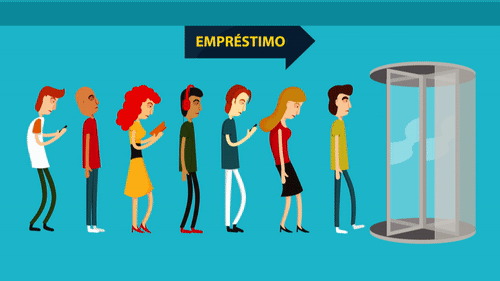

  A Análise Exploratória tem como objetivo investigar como os dados estão distribuídos, verificar correlações e estatísticas descritivas. É uma etapa muito valiosa para a resolução de um problema, pois nela obtemos informações importantes sobre os dados e como eles estão.

  Ao analisar nossa base de dados de 30.424 clientes que a empresa Mutual obtem, notamos que os dados estão distribuidos em 29,7% em mulheres e 70,3% em homens, conforme figura 1, a idade media destes clientes é de 31 anos no total, porem mulheres nesta base de dados são mais jovens que os homens com idade media respectivamente 29 e 32 anos.


  Conforme figura 2, 21,9% não pagaram seus emprestimos e 78,1% cumpriram com suas responsabilidades pagando os emprestimos, sendo assim, nesta distribuição que buscaremos entender o perfil dos clientes que possivelmente no futuro poderão não pagar os emprestimos.



  Na figura 3 "Relação da idade com a inadimplência" notamos que clientes jovens entre 18 a 25 anos o indice de inadimplencia é maior que os demais, simplificando em numeros 51,32% de todos inadimplentes tem idade entre 18 a 25 anos, o numero começa diminuir a partir dos 30 anos.


  O tempo de trabalho do cliente é de suma importancia na hora de forcer credito, geralmente pessoas que tendem a ficar mais tempo empregadas tera maior as chances de cumprirem com os seus compromissos financeiros, um exemplo é a figura 4 que mostra o tempo de trabalho e a inadimplência, nesta figura note que as pessoas que trabalham menos de 20 meses tendem a ter um maior indice de inadimplência, estas pessoas possuim 82,02% de toda inadimplência de nossa base de dados, enquanto os demais pagadores que trabalham a mais de 2 anos são apenas 17,98% da base de dados.

  Também muito importante levar em consideração é a renda do cliente, existe uma regra que os empréstimos contratados em nome do devedor, a soma dos descontos de todos eles não pode ultrapassar o limite de 30% dos seus vencimentos líquidos, sob pena de lhe causar a completa impossibilidade de subsistência, na figura 5 pessoas que tem renda liquida menor que 600 possui alto grau de inadimplência.

  O dia para pagamento dos emprestimos também nos mostrou uma grande relevância, pois as pessoas que pagam suas dividas ate o 5º dia util tem baixo indice de inadimplência com 7,68%, ja as pessoas que deixam para pagar final do mês acabam não pagando, talvez seja pelo fato que muitas empresas pagam seus funcionarios no inicio do mês, e caso a pessoa decida pagar só no final do mês acaba esquecendo suas responsabilidades ou não sobrando dinheiro.

  E por ultimo na figura 8 a baixo, temos a separação da inadimplencia por sexo, as mulheres são apenas 35,57% das não pagadoras enquanto os homens com 64,43%.

In [85]:
# buscando a media das variaveis de cada sexo.
cli_0 = previ.loc[previ['gender'] == 0].mean()  
cli_1 = previ.loc[previ['gender'] == 1].mean() 

In [86]:
# Utilizando função DESCRIBE para visualizar estatísticas descritivas, como: média, mediana, desvio padrão, quartis, valores mínimos e valores máximos
previ.describe()

,gender,maritalStatus,age,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,personalNetIncome,NEG
count,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000,30424.000000
mean,0.703228,0.641500,31.557882,0.794373,33.996516,15.434920,0.019656,0.466441,145.145412,0.996121,0.955759,0.468545,0.991224,22.686563,485.575434,40.705430,0.979030,414.546838,0.218512
std,0.456843,0.963878,11.680399,0.404166,10.616174,7.150408,0.234730,0.848086,126.795887,0.062158,0.205634,0.499018,0.093270,24.062390,388.540294,327.317553,0.143287,231.820840,0.413243
min,0.000000,0.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,1.000000,31.000000,12.000000,0.000000,0.000000,36.000000,1.000000,1.000000,0.000000,1.000000,12.000000,70.000000,0.000000,1.000000,250.000000,0.000000
50%,1.000000,0.000000,29.000000,1.000000,31.000000,12.000000,0.000000,0.000000,120.000000,1.000000,1.000000,0.000000,1.000000,12.000000,514.000000,0.000000,1.000000,350.000000,0.000000
75%,1.000000,1.000000,39.000000,1.000000,31.000000,20.000000,0.000000,1.000000,240.000000,1.000000,1.000000,1.000000,1.000000,36.000000,950.000000,0.000000,1.000000,520.000000,0.000000
max,1.000000,4.000000,70.000000,1.000000,70.000000,28.000000,3.000000,3.000000,600.000000,1.000000,1.000000,1.000000,1.000000,96.000000,999.000000,22400.000000,1.000000,1100.000000,1.000000


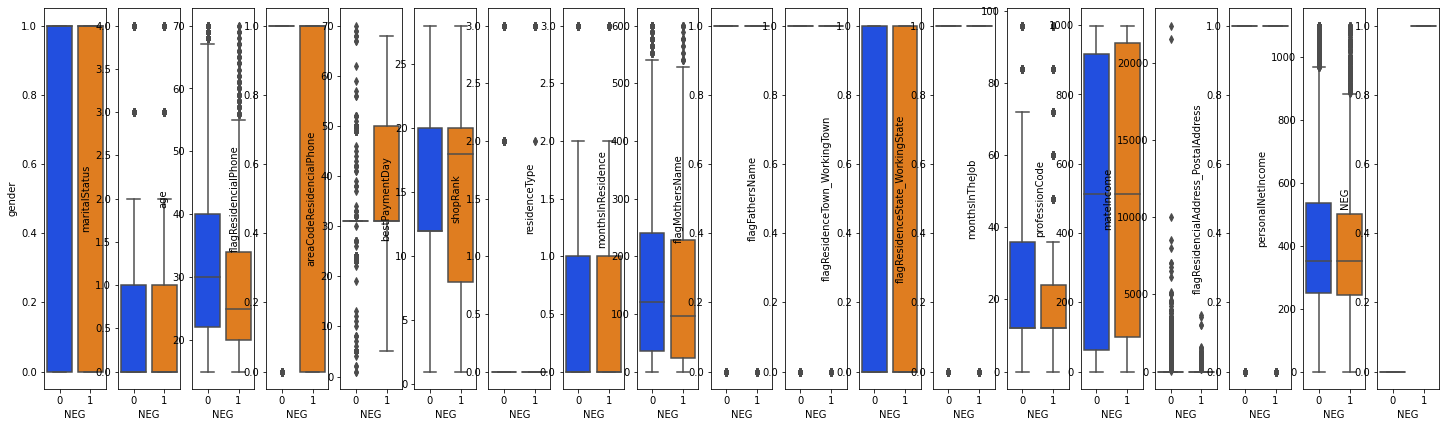

In [87]:
# utilizando boxplot de todas as variaveis numericas para buscar possiveis outliers
colunas_numericas = previ.describe().columns
%matplotlib inline
plt.figure(figsize=(25,7))
for i,col in enumerate(colunas_numericas):
    plt.subplot(1,len(colunas_numericas),i+1)
    sns.boxplot(previ['NEG'],previ[col], palette="bright");

In [88]:
import plotly.express as px 
names = previ['gender']
fig = px.pie(names=names,title='Figura 1 - Genero dos Clientes: 29,7% são mulheres e 70,3% homens') 
fig.show()

In [89]:
import plotly.express as px 
names = previ['NEG']
fig = px.pie(names=names, title='Figura 2 - Distruição inadimplência (0 Pagadores e 1 não-pagadores)') 
fig.show()

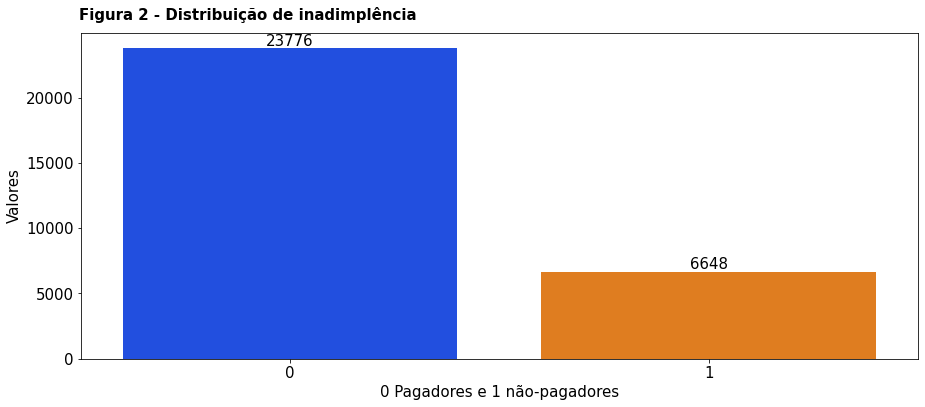

In [90]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x=previ['NEG'], palette="bright");
plt.title('Figura 2 - Distribuição de inadimplência', fontsize=15, fontweight='bold', x=0.20, y=1.02)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('0 Pagadores e 1 não-pagadores',fontsize=15)
plt.ylabel('Valores',fontsize=15)
for b in ax.patches:
  ax.annotate(f'{b.get_height()}', (b.get_x()+0.4, b.get_height()+200), ha='center', fontsize=15)
plt.show()



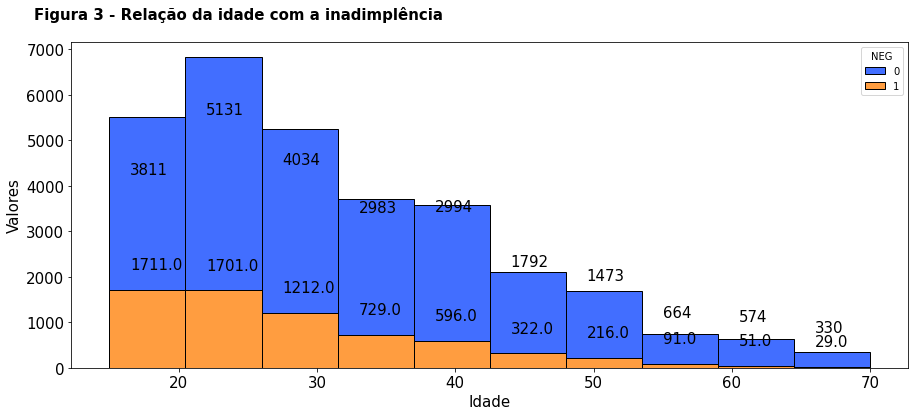

In [91]:
plt.figure(figsize=(15,6))
plt.title('Figura 3 - Relação da idade com a inadimplência', fontsize=15, fontweight='bold', x=0.20, y=1.05)
ax = sns.histplot(bins=10, x="age", hue="NEG", data=previ, multiple="stack", palette="bright");
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Idade',fontsize=15)
plt.ylabel('Valores',fontsize=15)
for b in ax.patches:
  ax.annotate(f'{b.get_height()+1}', (b.get_x()+1.5, b.get_height()+450), fontsize=15)
plt.show()

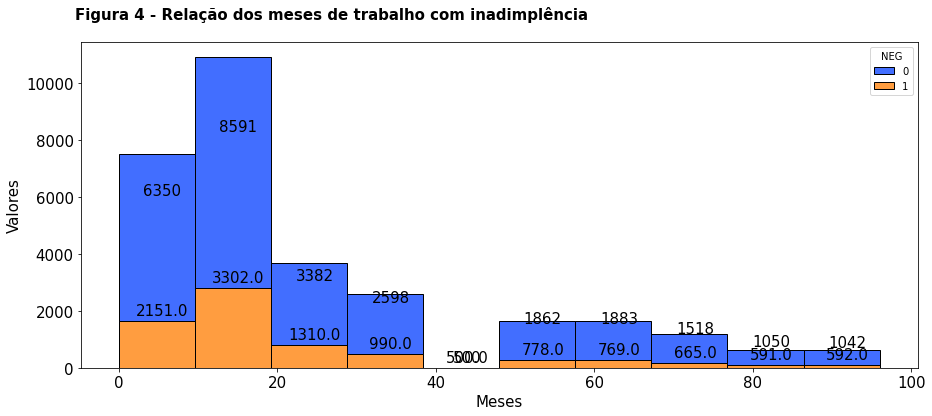

In [92]:
plt.figure(figsize=(15,6))
plt.title('Figura 4 - Relação dos meses de trabalho com inadimplência', fontsize=15, fontweight='bold', x=0.30, y=1.05)
ax = sns.histplot(bins=10, x="monthsInTheJob", hue="NEG", data=previ, multiple="stack", palette="bright");
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Meses',fontsize=15)
plt.ylabel('Valores',fontsize=15)
for b in ax.patches:
  ax.annotate(f'{b.get_height()+500}', (b.get_x()+5.5, b.get_height()+200), ha='center', fontsize=15)
plt.show()

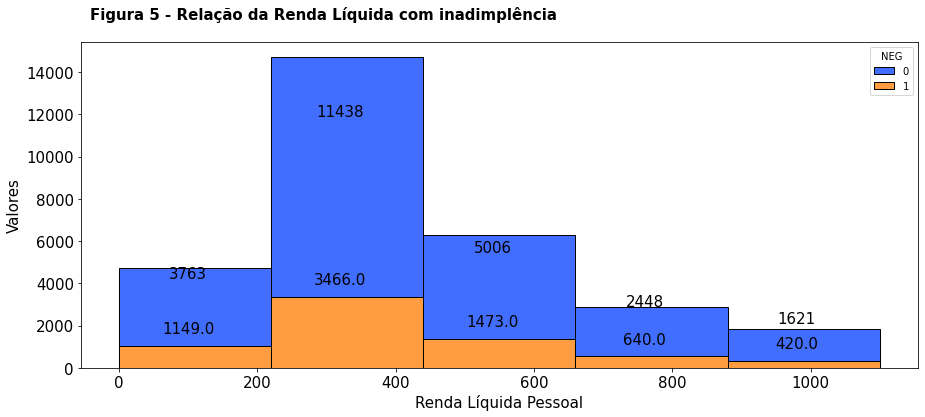

In [93]:
plt.figure(figsize=(15,6))
plt.title('Figura 5 - Relação da Renda Líquida com inadimplência', fontsize=15, fontweight='bold', x=0.29, y=1.05)
ax = sns.histplot(bins=5, x="personalNetIncome", hue="NEG", data=previ, multiple="stack", palette="bright");
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Renda Líquida Pessoal',fontsize=15)
plt.ylabel('Valores',fontsize=15)
for b in ax.patches:
  ax.annotate(f'{b.get_height()+100}', (b.get_x()+100, b.get_height()+590), ha='center', fontsize=15)
plt.show()

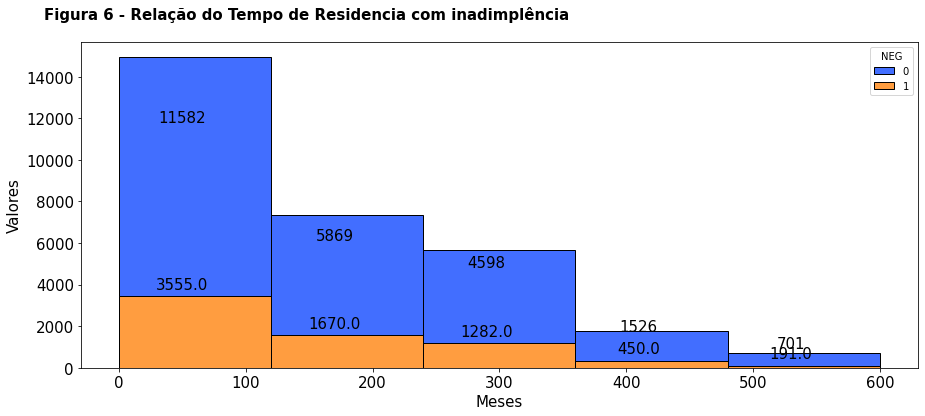

In [94]:
plt.figure(figsize=(15,6))
plt.title('Figura 6 - Relação do Tempo de Residencia com inadimplência', fontsize=15, fontweight='bold', x=0.27, y=1.05)
ax = sns.histplot(bins=5, x="monthsInResidence", hue="NEG", data=previ, multiple="stack", palette="bright");
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Meses',fontsize=15)
plt.ylabel('Valores',fontsize=15)
for b in ax.patches:
  ax.annotate(f'{b.get_height()+100}', (b.get_x()+50, b.get_height()+350), ha='center', fontsize=15)
plt.show()


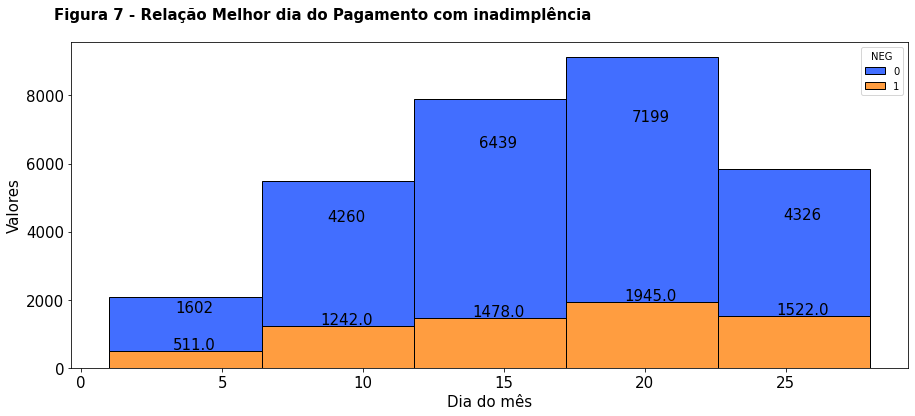

In [95]:
plt.figure(figsize=(15,6))
plt.title('Figura 7 - Relação Melhor dia do Pagamento com inadimplência', fontsize=15, fontweight='bold', x=0.30, y=1.05)
ax = sns.histplot(bins=5, x="bestPaymentDay", hue="NEG", data=previ, multiple="stack", palette="bright");
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Dia do mês',fontsize=15)
plt.ylabel('Valores',fontsize=15)
for b in ax.patches:
  ax.annotate(f'{b.get_height()+10}', (b.get_x()+3, b.get_height()+50), ha='center', fontsize=15)
plt.show()

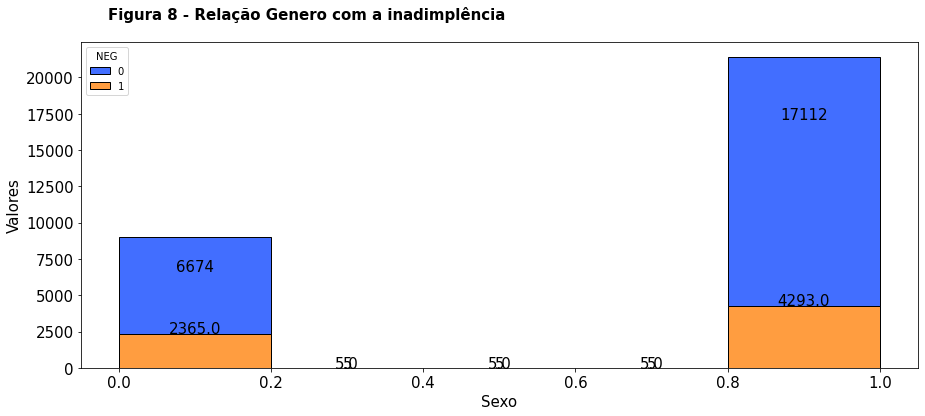

In [96]:
plt.figure(figsize=(15,6))
plt.title('Figura 8 - Relação Genero com a inadimplência', fontsize=15, fontweight='bold', x=0.27, y=1.05)
ax = sns.histplot(bins=5, x="gender", hue="NEG", data=previ, multiple="stack", palette="bright");
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sexo',fontsize=15)
plt.ylabel('Valores',fontsize=15)
for b in ax.patches:
  ax.annotate(f'{b.get_height()+5}', (b.get_x()+0.1, b.get_height()+2), ha='center', fontsize=15)
plt.show()

In [97]:
previ.head(3)

,gender,maritalStatus,age,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,personalNetIncome,NEG
0,1,0,18,1,31,20,0,0,216,1,1,1,1,12,853,0,1,300,0
1,1,1,47,0,31,25,0,0,180,1,1,0,1,24,35,0,1,304,0
2,1,0,28,1,31,25,0,3,12,1,1,1,1,12,24,0,1,250,0


# **Machine Learning**

### **Dividindo os dados**

In [98]:
# dividindo os dados X_train para variaveis de treino e y_train como target
X_train = previ.iloc[:, 0:18]
y_train = previ.iloc[:,18]

In [99]:
# visualizando a quantidade de colunas e linhas da divisão.
X_train.shape, y_train.shape

((30424, 18), (30424,))

In [100]:
X_train 

,gender,maritalStatus,age,flagResidencialPhone,areaCodeResidencialPhone,bestPaymentDay,shopRank,residenceType,monthsInResidence,flagMothersName,flagFathersName,flagResidenceTown_WorkingTown,flagResidenceState_WorkingState,monthsInTheJob,professionCode,mateIncome,flagResidencialAddress_PostalAddress,personalNetIncome
0,1,0,18,1,31,20,0,0,216,1,1,1,1,12,853,0,1,300
1,1,1,47,0,31,25,0,0,180,1,1,0,1,24,35,0,1,304
2,1,0,28,1,31,25,0,3,12,1,1,1,1,12,24,0,1,250
3,0,0,26,0,31,28,0,0,180,1,1,0,1,0,999,0,1,800
4,1,0,22,1,31,12,0,1,0,1,1,1,1,48,999,0,1,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40159,0,1,29,1,31,12,0,1,36,1,1,0,1,24,305,0,1,796
40160,1,0,20,1,31,20,0,0,180,1,1,1,1,12,712,0,1,200
40161,0,0,21,1,31,12,0,0,120,1,1,1,1,12,218,0,1,234
40162,1,0,23,1,31,28,0,0,264,1,1,1,1,12,991,0,1,240


### **Processamento dos dados**

A baixo iremos deixar padrão as features, e assim removendo a escala a média a variância a uma unidade. Isso significa que para cada feature, a média seria 0, e o Desvio Padrão seria 1. Desta forma, as features serão padronizadas, tornando-as mais manejáveis para nossos modelos.

Iremos utilizar (*StandardScaler*) para o algoritmo não ficar enviezado e dar importacia aos valores maiores, por isso o ideal é padronizar os valores, neste caso, como a renda é maior que a idade, o algoritmo pode classificar a renda como mais importante do que a idade ou a renda mais importante que o dia do pagamento.

In [101]:
!pip install scikit-plot
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
#padronizandos a escalas da nossa matriz
scaler_treino = StandardScaler()
X_train = scaler_treino.fit_transform(X_train)

In [103]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Utilizando SMOTE para balancear a variavel target**

In [104]:
# carregando a biblioteca SMOTE para balancear os dados alvos
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [105]:
X_train.shape

(47552, 18)

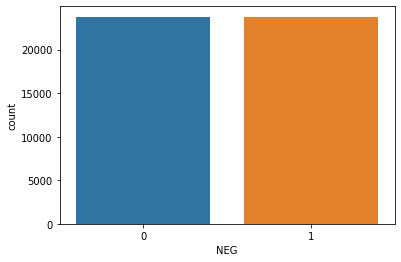

In [106]:
ax = sns.countplot(x=y_train)



Agora, quando todas as variáveis ​​categóricas são transformadas e todos os recursos numéricos são normalizados, precisamos dividir nossos dados em conjuntos de treinamento e teste. Dividimos 80% para treinamento e 20% para teste.



In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_teste, y_train, y_teste = train_test_split(X_train, y_train, test_size= 0.20, random_state = 0)
X_train.shape, y_train.shape, X_teste.shape, y_teste.shape, 

((38041, 18), (38041,), (9511, 18), (9511,))

### **CRIANDO PREVISÃO UTILIZANDO ALGORITMO RANDON FOREST 85,53%**

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [110]:
randon_florest_inadimplencia = RandomForestClassifier(n_estimators=110, criterion='entropy', max_depth=None, max_features = "sqrt",\
min_samples_leaf = 2, min_samples_split = 2, random_state=0)

randon_florest_inadimplencia.fit(X_train, y_train)

result_rand_forest = randon_florest_inadimplencia.predict(X_teste)

In [111]:
accuracy_score(result_rand_forest, y_teste)

0.8553254126800547

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      5491
           1       0.78      0.92      0.84      4020

    accuracy                           0.86      9511
   macro avg       0.86      0.86      0.85      9511
weighted avg       0.87      0.86      0.86      9511



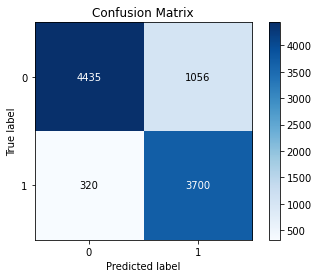

In [112]:
skplt.metrics.plot_confusion_matrix(result_rand_forest, y_teste)
print(classification_report(result_rand_forest, y_teste))

### **CRIANDO PREVISÃO UTILIZANDO ALGORITMO DECISION TREE 76%**

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
arvore_score = DecisionTreeClassifier(criterion='entropy', max_depth=None,\
                                      max_features = "sqrt", min_samples_leaf = 1, min_samples_split = 2, random_state=0)

arvore_score.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=0)

In [115]:
previsoes_arvore_score = arvore_score.predict(X_teste)

accuracy_score(previsoes_arvore_score, y_teste)

0.7600672905057302

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      4761
           1       0.76      0.76      0.76      4750

    accuracy                           0.76      9511
   macro avg       0.76      0.76      0.76      9511
weighted avg       0.76      0.76      0.76      9511



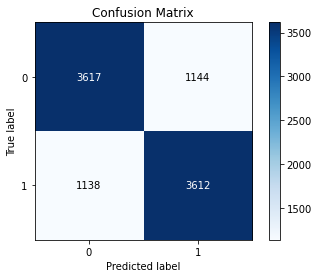

In [116]:
skplt.metrics.plot_confusion_matrix(previsoes_arvore_score, y_teste)
print(classification_report(previsoes_arvore_score, y_teste))

### **CRIANDO PREVISÃO UTILIZANDO ALGORITMO XGBOOST 85,39%**




In [117]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
clf = xgb.XGBClassifier(n_estimators = 950,
                    max_depth = 10, 
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=0)


In [119]:
clf.fit(X_train,y_train)
prev_score_XGBC = clf.predict(X_teste)
accuracy_score(prev_score_XGBC, y_teste)

0.8539585742824098

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      5816
           1       0.74      0.96      0.84      3695

    accuracy                           0.85      9511
   macro avg       0.85      0.87      0.85      9511
weighted avg       0.88      0.85      0.86      9511



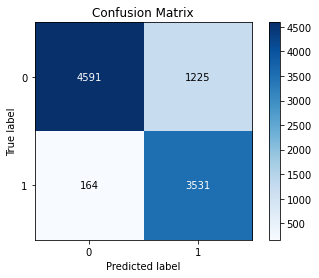

In [120]:
skplt.metrics.plot_confusion_matrix(prev_score_XGBC, y_teste)
print(classification_report(prev_score_XGBC, y_teste))

# **Avaliação de Resultados**

  Os nossos algoritmos de machine learn de classificação serão treinados com vários exemplos de pessoas que pagam emprestimo e pessoas que não pagaram os emprestimos. E a partir dessas informações prévias tentar “prever” se uma nova pessoa pagara ou não suas dividas.

  Para analisar se o modelo é capaz de “prever” se uma pessoa cumprira com suas responsabilidades sera preciso testar em novos dados que não foram utilizados no treinamento (aprendizado) do modelo. Para isso, utilizo observações (dados) que tenho a reposta (pessoas que já pagam e não pagaram) e analiso os resultados que o modelo estimou com os resultados que tenho.

  A matriz de confusão acima é uma maneira de exemplificar esses resultados e ela nos traz as informações das frequências dos acertos e erros do modelo. Estas frequencias iremos analisar cada uma a baixo:

## Avaliação Algoritmo Random Forest

**Cliente 0 classificado como Cliente 0:** são as 4435 observações que o modelo previu como pessoas que realmente pagaram o emprestimo, ou seja, o modelo classificou corretamente. Por exemplo, a pessoa realmete cumprira com seu compromisso e o modelo conseguiu identificar corretamente.

**Cliente 0 classificado como Cliente 1:** são as 1056 observações que o modelo previu como pessoas que não pagaram, mas na realidade eram pagadoras dos emprestimos. Ou seja, o modelo estimou errado a classe. Por exemplo, a pessoa pagara o emprestimo e o modelo prevê como não pagadora.

**Cliente 1 classificado como Cliente 1:** são as 3700 observações que o modelo previu como pessoas que  realmente não pagaram o emprestimo, ou seja, o modelo classificou corretamente. Por exemplo, a pessoa realmete não cumprira com seu compromisso e o modelo conseguiu identificar corretamente.

**Cliente 1 classificado como Cliente 0:** são as 320 observações que o modelo previu como pessoas que  pagaram, mas na realidade elas não pagaram os emprestimos. Ou seja, o modelo estimou errado a classe que temos interesse em estimar. Por exemplo, a pessoa não pagara o emprestimo e o modelo prevê como pagadora.


**Precision do modelo:** é a métrica que traz a informação da quantidade de observações classificadas corretamente, nossa precision (precisão) classificou corretamente 0,93 os clientes pagadores enquanto os não pagadores ele classificou corretamente apenas 0,78.

**Recall do modelo:** significa dentre todas as observações que são positiva quantas o modelo conseguiu identificar como positiva, ou seja, dentre os clientes que pagam os emprestimo o algoritmo identificou corretamente 0,81, enquanto os que não pagaram o emprestimo ele conseguiu identificar corretamente 0,92.


---


>Simplificando, nosso algoritmo Randon Forest conseguiu encontrar (*Recall* ) corretamente 0,81 dos clientes que pagam os emprestimos, quando ele encontra esses clientes ele acerta (*Precision*) 0,93. Já os não pagadores, quando o algoritmo encontra (*Recall* ) ele acerta 0,92 e quando ele encontra esses clientes ele acerta (*Precision*) apenas 0,78.








## Avaliação Algoritmo Decision Tree

**Cliente 0 classificado como Cliente 0:** são as 3617 observações que o modelo previu como pessoas que realmente pagaram o emprestimo, ou seja, o modelo classificou corretamente. Por exemplo, a pessoa realmete cumprira com seu compromisso e o modelo conseguiu identificar corretamente.

**Cliente 0 classificado como Cliente 1:** são as 1144 observações que o modelo previu como pessoas que não pagaram, mas na realidade eram pagadoras dos emprestimos. Ou seja, o modelo estimou errado a classe. Por exemplo, a pessoa pagara o emprestimo e o modelo prevê como não pagadora.

**Cliente 1 classificado como Cliente 1:** são as 3612 observações que o modelo previu como pessoas que realmente não pagaram o emprestimo, ou seja, o modelo classificou corretamente. Por exemplo, a pessoa realmete não cumprira com seu compromisso e o modelo conseguiu identificar corretamente.

**Cliente 1 classificado como Cliente 0:** são as 1138 observações que o modelo previu como pessoas que pagaram, mas na realidade elas não pagaram os emprestimos. Ou seja, o modelo estimou errado a classe que temos interesse em estimar. Por exemplo, a pessoa não pagara o emprestimo e o modelo prevê como pagadora.

**Precision do modelo:** é a métrica que traz a informação da quantidade de observações classificadas corretamente, nossa precision (precisão) classificou corretamente 0,76 os clientes pagadores enquanto os não pagadores ele classificou corretamente apenas 0,76.

**Recall do modelo:** significa dentre todas as observações que são positiva quantas o modelo conseguiu identificar como positiva, ou seja, dentre os clientes que pagam os emprestimo o algoritmo identificou corretamente 0,76, enquanto os que não pagaram o emprestimo ele conseguiu identificar corretamente 0,76.


---

>Simplificando, nosso algoritmo Decision Tree conseguiu encontrar (*Recall*) corretamente 0,76 dos clientes que pagam os emprestimos, quando ele encontra esses clientes ele acerta (*Precision*) 0,76. Já os não pagadores, quando o algoritmo encontra (*Recall*) ele acerta 0,76 e quando ele encontra esses clientes ele acerta (*Precision*) apenas 0,76.



## Avaliação Algoritmo XGBOOST

**Cliente 0 classificado como Cliente 0:** são as 4591 observações que o modelo previu como pessoas que realmente pagaram o emprestimo, ou seja, o modelo classificou corretamente. Por exemplo, a pessoa realmete cumprira com seu compromisso e o modelo conseguiu identificar corretamente.

**Cliente 0 classificado como Cliente 1:** são as 1225 observações que o modelo previu como pessoas que não pagaram, mas na realidade eram pagadoras dos emprestimos. Ou seja, o modelo estimou errado a classe. Por exemplo, a pessoa pagara o emprestimo e o modelo prevê como não pagadora.

**Cliente 1 classificado como Cliente 1:** são as 3531 observações que o modelo previu como pessoas que realmente não pagaram o emprestimo, ou seja, o modelo classificou corretamente. Por exemplo, a pessoa realmete não cumprira com seu compromisso e o modelo conseguiu identificar corretamente.

**Cliente 1 classificado como Cliente 0:** são as 164 observações que o modelo previu como pessoas que pagaram, mas na realidade elas não pagaram os emprestimos. Ou seja, o modelo estimou errado a classe que temos interesse em estimar. Por exemplo, a pessoa não pagara o emprestimo e o modelo prevê como pagadora.

**Precision do modelo:** é a métrica que traz a informação da quantidade de observações classificadas corretamente, nossa precision (precisão) classificou corretamente 0,97 os clientes pagadores enquanto os não pagadores ele classificou corretamente apenas 0,74.

**Recall do modelo:** significa dentre todas as observações que são positiva quantas o modelo conseguiu identificar como positiva, ou seja, dentre os clientes que pagam os emprestimo o algoritmo identificou corretamente 0,79, enquanto os que não pagaram o emprestimo ele conseguiu identificar corretamente 0,96.

>Simplificando, nosso algoritmo XGBOOST conseguiu encontrar (*Recall*) corretamente 0,79 dos clientes que pagam os emprestimos, quando ele encontra esses clientes ele acerta (*Precision*) 0,97. Já os não pagadores, quando o algoritmo encontra (*Recall*) ele acerta 0,96 e quando ele encontra esses clientes ele acerta (*Precision*) apenas 0,74.



## **Conclusão**

Neste projeto construímos uma linha de pensamento para resolver o problema de credit scoring  proposto pela Mutual. Seguimos uma estrutura específica para resolução deste problema. Conseguimos seguir todos os passos e desenvolver conhecimento sobre o problema a ser resolvido.

O problema de negócio com o qual encontramos foi se esclarendo com o avanço da Análise Exploratória dos dados, pois conseguimos obter insights poderosos para a construção do modelo. utilizamos técnicas de estatística simples para desenvolver tal projeto, focando na facilidade de entendimento, na simplicidade dos gráficos e no resultado a ser obtido.

O modelo que melhor performou ao conjunto de dados foi o **XGboost classifier** com acuracia de 85,39%. Mesmo não sendo uma acuracia tão alta, o Recall de 96% significa um bom resultado para o nosso objetivo final, pois de 3695 pessoas que não pagam os emprestimos nosso modelo acertou 3531 e errou somente 164.


**Curva ROC**

A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.

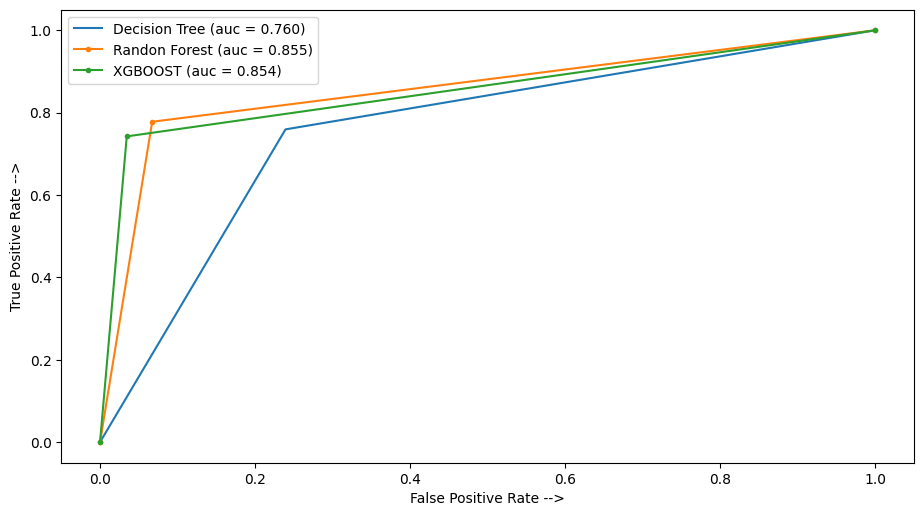

In [121]:
arvore_desc1, arvore_desc2, threshold = roc_curve(y_teste, previsoes_arvore_score)
auc_arvore1 = auc(arvore_desc1, arvore_desc2)

reg_logist1, reg_logist2, threshold = roc_curve(y_teste, previ_reg_logist_inadimplencia)
auc_logistc1 = auc(reg_logist1, reg_logist2)

random_forest1, random_forest2, threshold = roc_curve(y_teste, result_rand_forest)
auc_randomf1 = auc(random_forest1, random_forest2)

xgboost1, xgboost2, threshold = roc_curve(y_teste, prev_score_XGBC)
auc_xgboost1 = auc(xgboost1, xgboost2)

plt.figure(figsize=(11,6), dpi=100)
plt.plot(arvore_desc1, arvore_desc2, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_arvore1)

plt.plot(random_forest1, random_forest2, marker='.', label='Randon Forest (auc = %0.3f)' % auc_randomf1)

plt.plot(xgboost1, xgboost2, marker='.', label='XGBOOST (auc = %0.3f)' % auc_xgboost1)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()